# MVPC Pipeline — Running MVPC on Synthetic Data
This notebook loads the synthetic datasets generated in `01_generate_synthetic_data.ipynb` and runs the full MVPC pipeline:
- missingness‑parent detection  
- initial skeleton extraction  
- corrected skeleton search  
- orientation of the corrected skeleton  


In [180]:
import sys
import os

# Path to the project root (one level above the notebooks folder)
project_root = os.path.abspath("..")

# Add to Python path if not already present
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)

Project root added: /home/zervaki/Thesis_New


In [181]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm


from mvpc.mvpc_pipeline import MVPC
from mvpc.ci_tests.gauss_permc import gauss_ci_td, gauss_ci_permc
from mvpc.ci_tests.gauss_drw import gauss_ci_drw

from mvpc.ci_tests.gauss_drw import gauss_ci_drw


# binary tests
from mvpc.ci_tests.bin_drw import bin_ci_drw
from mvpc.ci_tests.bin_permc import bin_ci_permc
from mvpc.ci_tests.bin_td import bin_ci_td  

from mvpc.missingness import detection_prt_m
from mvpc.skeleton import skeleton2


In [183]:
# Load MAR Dataset
data_mar = pd.read_csv("../data/synthetic_data_csv_files/missing_mar.csv").values 
data_mar.shape

(2000, 20)

In [184]:
# Load MNAR Dataset
data_mnar = pd.read_csv("../data/synthetic_data_csv_files/missing_mnar.csv").values 
data_mnar.shape

(2000, 20)

In [218]:
# Run MVPC on MAR / MNAR Data

mvpc = MVPC(
    indep_test=gauss_ci_td,
    corr_test=gauss_ci_permc,
    alpha=0.05
)

res_mar = mvpc.run(data_mar)
res_mnar = mvpc.run(data_mnar)


from mvpc.ci_tests.gauss_permc import PERMC_COUNTER



print("=== MAR prt_m ===")
print("m:", res_mar["prt_m"]["m"])
print("prt:", res_mar["prt_m"]["prt"])

print("=== MNAR prt_m ===")
print("m:", res_mnar["prt_m"]["m"])
print("prt:", res_mnar["prt_m"]["prt"])

print("MAR corrected skeleton:", res_mar["G_corrected"].shape)
print("MNAR corrected skeleton:", res_mnar["G_corrected"].shape)


from mvpc.utils.mvpc_utils import PERMC_DIAG 
PERMC_DIAG



print ("______________________________________________")


from mvpc.ci_tests.gauss_permc import PERMC_FAIL


print("PERM_COUNTER__________________________________________")
print(PERMC_COUNTER)


print("PERMC_FAIL_________________________________________")
print(PERMC_FAIL)


[Step 1] m_inds (vars with NaNs): [1, 2, 5, 7, 14, 16]


Detecting parents of missingness indicators:   0%|          | 0/6 [00:00<?, ?it/s]

[Step 1] R_ind=1, parents=[np.int64(15)]


[Step 1] R_ind=2, parents=[np.int64(4), np.int64(8), np.int64(13)]


[Step 1] R_ind=5, parents=[np.int64(0)]


[Step 1] R_ind=7, parents=[np.int64(4)]


[Step 1] R_ind=14, parents=[np.int64(11)]


Detecting parents of missingness indicators: 100%|██████████| 6/6 [00:00<00:00, 194.24it/s]


[Step 1] R_ind=16, parents=[np.int64(13)]
[Step 1] m_inds_filtered (with ≥1 parent): [1, 2, 5, 7, 14, 16]
[Step 1] prt dict: {1: [np.int64(15)], 2: [np.int64(4), np.int64(8), np.int64(13)], 5: [np.int64(0)], 7: [np.int64(4)], 14: [np.int64(11)], 16: [np.int64(13)]}


[Step 1] m_inds (vars with NaNs): [1, 2, 4, 7, 8, 15]


Detecting parents of missingness indicators:   0%|          | 0/6 [00:00<?, ?it/s]

[Step 1] R_ind=1, parents=[np.int64(15)]


[Step 1] R_ind=2, parents=[np.int64(8), np.int64(13)]


[Step 1] R_ind=4, parents=[np.int64(1), np.int64(16)]


[Step 1] R_ind=7, parents=[np.int64(4)]


[Step 1] R_ind=8, parents=[np.int64(10)]


Detecting parents of missingness indicators: 100%|██████████| 6/6 [00:00<00:00, 217.87it/s]


[Step 1] R_ind=15, parents=[np.int64(5)]
[Step 1] m_inds_filtered (with ≥1 parent): [1, 2, 4, 7, 8, 15]
[Step 1] prt dict: {1: [np.int64(15)], 2: [np.int64(8), np.int64(13)], 4: [np.int64(1), np.int64(16)], 7: [np.int64(4)], 8: [np.int64(10)], 15: [np.int64(5)]}


=== MAR prt_m ===
m: [1, 2, 5, 7, 14, 16]
prt: {1: [np.int64(15)], 2: [np.int64(4), np.int64(8), np.int64(13)], 5: [np.int64(0)], 7: [np.int64(4)], 14: [np.int64(11)], 16: [np.int64(13)]}
=== MNAR prt_m ===
m: [1, 2, 4, 7, 8, 15]
prt: {1: [np.int64(15)], 2: [np.int64(8), np.int64(13)], 4: [np.int64(1), np.int64(16)], 7: [np.int64(4)], 8: [np.int64(10)], 15: [np.int64(5)]}
MAR corrected skeleton: (20, 20)
MNAR corrected skeleton: (20, 20)
______________________________________________
PERM_COUNTER__________________________________________
{'total_calls': 132, 'used': 9, 'fallback': 123}
PERMC_FAIL_________________________________________
{'no_W': 0, 'tw_too_small': 0, 'no_W_columns': 196, 'regression_fail': 294, 'success': 27}


In [219]:
print("MAR corrected skeleton:")
print(res_mar["G_corrected"])


MAR corrected skeleton:
[[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [220]:
print("MNAR corrected skeleton:")
print(res_mnar["G_corrected"])


MNAR corrected skeleton:
[[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [221]:
# === MVPC with DRW CI test ===

mvpc_drw = MVPC(
    indep_test=gauss_ci_td,     # TD for missingness detection
    corr_test=gauss_ci_drw,     # DRW for skeleton correction
    alpha=0.05
)


res_mar_drw = mvpc_drw.run(data_mar)
res_mnar_drw = mvpc_drw.run(data_mnar)
from mvpc.ci_tests.gauss_drw import DRW_COUNTER
print(DRW_COUNTER)


print("=== MAR (DRW) prt_m ===")
print("m:", res_mar_drw["prt_m"]["m"])
print("prt:", res_mar_drw["prt_m"]["prt"])

print("\n=== MNAR (DRW) prt_m ===")
print("m:", res_mnar_drw["prt_m"]["m"])
print("prt:", res_mnar_drw["prt_m"]["prt"])


[Step 1] m_inds (vars with NaNs): [1, 2, 5, 7, 14, 16]


Detecting parents of missingness indicators:   0%|          | 0/6 [00:00<?, ?it/s]

[Step 1] R_ind=1, parents=[np.int64(15)]


[Step 1] R_ind=2, parents=[np.int64(4), np.int64(8), np.int64(13)]


[Step 1] R_ind=5, parents=[np.int64(0)]


[Step 1] R_ind=7, parents=[np.int64(4)]


[Step 1] R_ind=14, parents=[np.int64(11)]


Detecting parents of missingness indicators: 100%|██████████| 6/6 [00:00<00:00, 187.16it/s]


[Step 1] R_ind=16, parents=[np.int64(13)]
[Step 1] m_inds_filtered (with ≥1 parent): [1, 2, 5, 7, 14, 16]
[Step 1] prt dict: {1: [np.int64(15)], 2: [np.int64(4), np.int64(8), np.int64(13)], 5: [np.int64(0)], 7: [np.int64(4)], 14: [np.int64(11)], 16: [np.int64(13)]}


[Step 1] m_inds (vars with NaNs): [1, 2, 4, 7, 8, 15]


Detecting parents of missingness indicators:   0%|          | 0/6 [00:00<?, ?it/s]

[Step 1] R_ind=1, parents=[np.int64(15)]


[Step 1] R_ind=2, parents=[np.int64(8), np.int64(13)]


[Step 1] R_ind=4, parents=[np.int64(1), np.int64(16)]


[Step 1] R_ind=7, parents=[np.int64(4)]


[Step 1] R_ind=8, parents=[np.int64(10)]


Detecting parents of missingness indicators: 100%|██████████| 6/6 [00:00<00:00, 205.85it/s]


[Step 1] R_ind=15, parents=[np.int64(5)]
[Step 1] m_inds_filtered (with ≥1 parent): [1, 2, 4, 7, 8, 15]
[Step 1] prt dict: {1: [np.int64(15)], 2: [np.int64(8), np.int64(13)], 4: [np.int64(1), np.int64(16)], 7: [np.int64(4)], 8: [np.int64(10)], 15: [np.int64(5)]}


{'used': 388, 'fallback': 1034}
=== MAR (DRW) prt_m ===
m: [1, 2, 5, 7, 14, 16]
prt: {1: [np.int64(15)], 2: [np.int64(4), np.int64(8), np.int64(13)], 5: [np.int64(0)], 7: [np.int64(4)], 14: [np.int64(11)], 16: [np.int64(13)]}

=== MNAR (DRW) prt_m ===
m: [1, 2, 4, 7, 8, 15]
prt: {1: [np.int64(15)], 2: [np.int64(8), np.int64(13)], 4: [np.int64(1), np.int64(16)], 7: [np.int64(4)], 8: [np.int64(10)], 15: [np.int64(5)]}


In [222]:
print("MAR corrected skeleton for DRW:")
print(res_mar_drw["G_corrected"])

MAR corrected skeleton for DRW:
[[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0]]


In [223]:
print("MNAR corrected skeleton:")
print(res_mnar_drw["G_corrected"])

MNAR corrected skeleton:
[[0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [230]:
data_mar = pd.read_csv("../data/synthetic_data_csv_files/missing_mar.csv").values
data_mnar = pd.read_csv("../data/synthetic_data_csv_files/missing_mnar.csv").values

print(data_mar.shape, data_mnar.shape)


(2000, 20) (2000, 20)


In [231]:
# MAR

gt_mar = pd.read_csv("../data/synthetic_data_csv_files/missingness_structure_mar.csv")

# Convert 1‑based → 0‑based
true_ms_mar = (gt_mar["m_ind"]).tolist()
true_prt_ms_mar = (gt_mar["parent_m_ind"]).tolist()

true_prt_mar = {m: p for m, p in zip(true_ms_mar, true_prt_ms_mar)}
true_prt_mar


{2: 8, 7: 4, 1: 15, 5: 0, 16: 13, 14: 11}

In [232]:
# MNAR

gt_mnar = pd.read_csv("../data/synthetic_data_csv_files/missingness_structure_mnar.csv")

true_ms_mnar = (gt_mnar["m_ind"]).tolist()
true_prt_ms_mnar = (gt_mnar["parent_m_ind"]).tolist()

true_prt_mnar = {m: p for m, p in zip(true_ms_mnar, true_prt_ms_mnar)}
true_prt_mnar


{2: 8, 7: 4, 1: 15, 8: 10, 4: 16, 15: 5}

In [233]:
est_prt_mar = res_mar["prt_m"]["prt"]
est_prt_mnar = res_mnar["prt_m"]["prt"]


In [234]:
def evaluate_missingness_parents(true_prt, est_prt):
    rows = []
    for m, true_parent in true_prt.items():
        est = est_prt.get(m, [])
        rows.append({
            "R_ind": m,
            "true_parent": true_parent,
            "estimated_parents": est,
            "correct": true_parent in est
        })
    return pd.DataFrame(rows)


In [235]:
eval_mar = evaluate_missingness_parents(true_prt_mar, est_prt_mar)
eval_mar


,R_ind,true_parent,estimated_parents,correct
0,2,8,"[4, 8, 13]",True
1,7,4,[4],True
2,1,15,[15],True
3,5,0,[0],True
4,16,13,[13],True
5,14,11,[11],True


In [236]:
eval_mnar = evaluate_missingness_parents(true_prt_mnar, est_prt_mnar)
eval_mnar


,R_ind,true_parent,estimated_parents,correct
0,2,8,"[8, 13]",True
1,7,4,[4],True
2,1,15,[15],True
3,8,10,[10],True
4,4,16,"[1, 16]",True
5,15,5,[5],True


In [237]:
eval_mar_drw = evaluate_missingness_parents(true_prt_mar, res_mar_drw["prt_m"]["prt"])

print("=== MAR DRW Missingness Parent Recovery ===")
display(eval_mar_drw)



=== MAR DRW Missingness Parent Recovery ===


,R_ind,true_parent,estimated_parents,correct
0,2,8,"[4, 8, 13]",True
1,7,4,[4],True
2,1,15,[15],True
3,5,0,[0],True
4,16,13,[13],True
5,14,11,[11],True


In [238]:
eval_mnar_drw = evaluate_missingness_parents(true_prt_mnar, res_mnar_drw["prt_m"]["prt"])
print("=== MNAR DRW Missingness Parent Recovery ===")
display(eval_mnar_drw)


=== MNAR DRW Missingness Parent Recovery ===


,R_ind,true_parent,estimated_parents,correct
0,2,8,"[8, 13]",True
1,7,4,[4],True
2,1,15,[15],True
3,8,10,[10],True
4,4,16,"[1, 16]",True
5,15,5,[5],True


In [239]:
pd.concat([
    eval_mar.assign(method="TD"),
    eval_mar_drw.assign(method="DRW")
])


,R_ind,true_parent,estimated_parents,correct,method
0,2,8,"[4, 8, 13]",True,TD
1,7,4,[4],True,TD
2,1,15,[15],True,TD
3,5,0,[0],True,TD
4,16,13,[13],True,TD
5,14,11,[11],True,TD
0,2,8,"[4, 8, 13]",True,DRW
1,7,4,[4],True,DRW
2,1,15,[15],True,DRW
3,5,0,[0],True,DRW


In [240]:
pd.concat([
    eval_mnar.assign(method="TD"),
    eval_mnar_drw.assign(method="DRW")
])

,R_ind,true_parent,estimated_parents,correct,method
0,2,8,"[8, 13]",True,TD
1,7,4,[4],True,TD
2,1,15,[15],True,TD
3,8,10,[10],True,TD
4,4,16,"[1, 16]",True,TD
5,15,5,[5],True,TD
0,2,8,"[8, 13]",True,DRW
1,7,4,[4],True,DRW
2,1,15,[15],True,DRW
3,8,10,[10],True,DRW


In [241]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_missingness_graph(prt_m, p, figsize=(10, 6)):
    """
    Visualize the missingness-parent graph recovered by MVPC.

    prt_m: dict with keys:
        - "m": list of variables with missingness
        - "prt": dict mapping R_ind -> list of parent indices
    p: number of variables in the dataset
    """

    G = nx.DiGraph()

    # Add X nodes
    for i in range(p):
        G.add_node(f"X{i}", color="skyblue", style="filled")

    # Add R nodes only for variables with missingness
    for r in prt_m["m"]:
        G.add_node(f"R{r}", color="lightcoral", style="filled")

    # Add edges X_k -> R_j
    for r, parents in prt_m["prt"].items():
        for parent in parents:
            G.add_edge(f"X{parent}", f"R{r}")

    # Layout: X nodes on left, R nodes on right
    pos = {}
    xs = [n for n in G.nodes if n.startswith("X")]
    rs = [n for n in G.nodes if n.startswith("R")]

    for i, x in enumerate(xs):
        pos[x] = (-1, -i)

    for i, r in enumerate(rs):
        pos[r] = (1, -i)

    # Draw
    plt.figure(figsize=figsize)
    colors = [G.nodes[n]["color"] for n in G.nodes]

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=colors,
        node_size=1200,
        font_size=10,
        arrowsize=20,
        edge_color="gray",
    )

    plt.title("Missingness Graph (Parents of Missingness Indicators)")
    plt.axis("off")
    plt.show()


In [244]:
import numpy as np

def shd_skeleton(G_est, G_true):
    """
    Structural Hamming Distance for skeletons.
    Both matrices should be binary adjacency matrices (0/1).
    Skeleton = undirected, so symmetrize before comparison.
    """
    G_est_sym = ((G_est + G_est.T) > 0).astype(int)
    G_true_sym = ((G_true + G_true.T) > 0).astype(int)
    return np.sum(G_est_sym != G_true_sym)


In [245]:
adj_true_mar = pd.read_csv("../data/synthetic_data_csv_files/adjacency_mar.csv").values
adj_true_mnar = pd.read_csv("../data/synthetic_data_csv_files/adjacency_mnar.csv").values


In [246]:
# --- MAR SHD ---
shd_td_mar = shd_skeleton(res_mar["G_corrected"], adj_true_mar)
shd_permc_mar = shd_skeleton(res_mar["G_corrected"], adj_true_mar)  # same as TD because corr_test=PermC
shd_drw_mar = shd_skeleton(res_mar_drw["G_corrected"], adj_true_mar)

# --- MNAR SHD ---
shd_td_mnar = shd_skeleton(res_mnar["G_corrected"], adj_true_mnar)
shd_permc_mnar = shd_skeleton(res_mnar["G_corrected"], adj_true_mnar)
shd_drw_mnar = shd_skeleton(res_mnar_drw["G_corrected"], adj_true_mnar)

print("MAR SHD:")
print("TD-PC:", shd_td_mar)
print("PermC:", shd_permc_mar)
print("DRW:", shd_drw_mar)

print("\nMNAR SHD:")
print("TD-PC:", shd_td_mnar)
print("PermC:", shd_permc_mnar)
print("DRW:", shd_drw_mnar)


MAR SHD:
TD-PC: 22
PermC: 22
DRW: 10

MNAR SHD:
TD-PC: 12
PermC: 12
DRW: 8


In [215]:
import pandas as pd

df_shd = pd.DataFrame({
    "Method": ["TD-PC", "MVPC-PermC", "MVPC-DRW"],
    "MAR_SHD": [shd_td_mar, shd_permc_mar, shd_drw_mar],
    "MNAR_SHD": [shd_td_mnar, shd_permc_mnar, shd_drw_mnar]
})

df_shd


,Method,MAR_SHD,MNAR_SHD
0,TD-PC,22,12
1,MVPC-PermC,22,12
2,MVPC-DRW,10,8


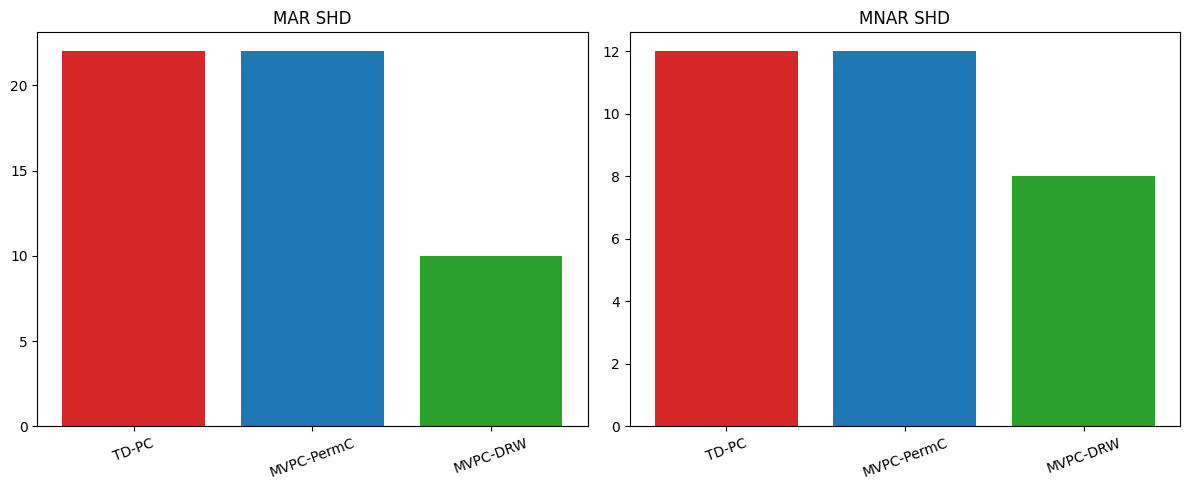

In [216]:
import matplotlib.pyplot as plt
import numpy as np

methods = ["TD-PC", "MVPC-PermC", "MVPC-DRW"]
x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# MAR
ax[0].bar(x, df_shd["MAR_SHD"], color=["#d62728", "#1f77b4", "#2ca02c"])
ax[0].set_title("MAR SHD")
ax[0].set_xticks(x)
ax[0].set_xticklabels(methods, rotation=20)

# MNAR
ax[1].bar(x, df_shd["MNAR_SHD"], color=["#d62728", "#1f77b4", "#2ca02c"])
ax[1].set_title("MNAR SHD")
ax[1].set_xticks(x)
ax[1].set_xticklabels(methods, rotation=20)

plt.tight_layout()
plt.show()
